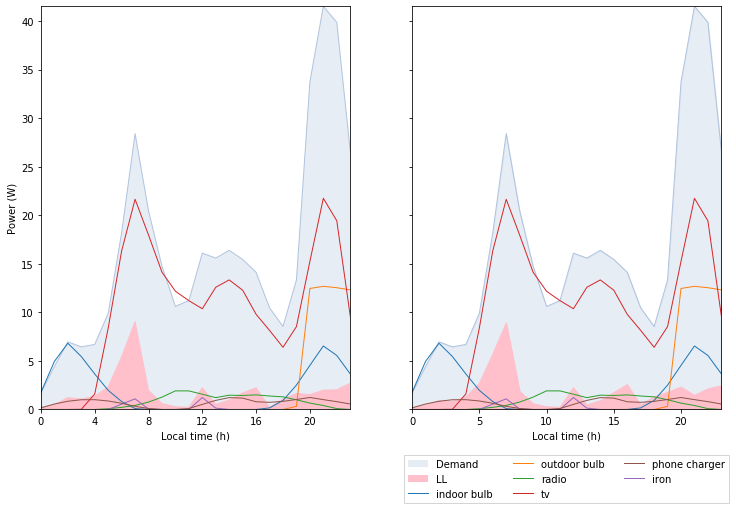

<Figure size 3600x3600 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 19 17:27:42 2021

@author: HP Pavilion 15-AU123
"""

#Declaramos las librerias
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

#insertamos cada app
indoor_bulb=pd.read_csv('indoor_bulb_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
outdoor_bulb=pd.read_csv('outdoor_bulb_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
radio=pd.read_csv('radio_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
tv=pd.read_csv('tv_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
phone_charger=pd.read_csv('phone_charger_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
bsb=pd.read_csv('bsb_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)

#water_heater=pd.read_csv('water_heater_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
#mixer=pd.read_csv('mixer_hourly.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)

#renombramos las COLUMNAS
#mixer=mixer.rename({'1': 'mixer'}, axis='columns')
#water_heater=water_heater.rename({'1': 'water_heater'}, axis='columns')
phone_charger=phone_charger.rename({'1': 'phone_charger'}, axis='columns')
tv=tv.rename({'1': 'tv'}, axis='columns')
radio=radio.rename({'1': 'radio'}, axis='columns')
outdoor_bulb=outdoor_bulb.rename({'1': 'outdoor_bulb'}, axis='columns')
indoor_bulb=indoor_bulb.rename({'1': 'indoor_bulb'}, axis='columns')
bsb=bsb.rename({'1': 'bsb'}, axis='columns')

#limpieza de datos
#del mixer['Unnamed: 0']
#del water_heater['Unnamed: 0']
del phone_charger['Unnamed: 0']
del tv['Unnamed: 0']
del radio['Unnamed: 0']
del outdoor_bulb['Unnamed: 0']
del indoor_bulb['Unnamed: 0']
del bsb['Unnamed: 0']

#demanda promedio (media horaria)
h_BSA=pd.read_csv('hourly_BS_B.csv', sep=',', decimal=',', encoding='latin1', error_bad_lines=False)
del h_BSA['Unnamed: 0']

#llamamos a la perdida de carga
xls = pd.ExcelFile('BSB_LCOE.xls')
sheetX=xls.parse(1)
df=sheetX['Lost Load 1 (Wh)']
LCOE_BSA=pd.DataFrame(df)
LCOE_BSA['Lost Load 1 (Wh)']=LCOE_BSA['Lost Load 1 (Wh)']*1000

#llamamos a la perdida de carga
xls = pd.ExcelFile('BSB_NPC.xls')
sheetX=xls.parse(1)
df=sheetX['Lost Load 1 (Wh)']
NPC_BSA=pd.DataFrame(df)
NPC_BSA['Lost Load 1 (Wh)']=NPC_BSA['Lost Load 1 (Wh)']*1000

#LCOE

#unimos todo el data
BSAhourly=pd.concat([LCOE_BSA, h_BSA,indoor_bulb,outdoor_bulb,radio,tv,phone_charger,bsb], axis=1, sort=False)

#renombramos
BSAhourly=BSAhourly.rename({'Lost Load 1 (Wh)': 'LL', '1': 'Demand'}, axis='columns')

#time series
BSAhourly['time']=pd.date_range(start='1/1/2018', end='1/1/2019', freq='1H', closed='left')
BSAhourly['time'] = BSAhourly['time'].astype('str') 
BSAhourly[['local_date','local_time']] = BSAhourly.time.str.split(" ",expand=True,)
BSAhourly[['local_hour','local_min', 'local_sec']] = BSAhourly.local_time.str.split(":",expand=True,)
BSAhourly[['local_year','local_month', 'local_day']] = BSAhourly.local_date.str.split("-",expand=True,)

#to float
BSAhourly['Demand'] = BSAhourly['Demand'].astype(float)
BSAhourly['indoor_bulb'] = BSAhourly['indoor_bulb'].astype(float)
BSAhourly['outdoor_bulb'] = BSAhourly['outdoor_bulb'].astype(float)
BSAhourly['radio'] = BSAhourly['radio'].astype(float)
BSAhourly['tv'] = BSAhourly['tv'].astype(float)
BSAhourly['phone_charger'] = BSAhourly['phone_charger'].astype(float)
BSAhourly['bsb'] = BSAhourly['bsb'].astype(float)
#BSAhourly['water_heater'] = BSAhourly['water_heater'].astype(float)
#BSAhourly['mixer'] = BSAhourly['mixer'].astype(float)

#NPC

#unimos todo el data
BSAhourly_1=pd.concat([NPC_BSA, h_BSA,indoor_bulb,outdoor_bulb,radio,tv,phone_charger,bsb], axis=1, sort=False)

#renombramos
BSAhourly_1=BSAhourly_1.rename({'Lost Load 1 (Wh)': 'LL', '1': 'Demand'}, axis='columns')

#time series
BSAhourly_1['time']=pd.date_range(start='1/1/2018', end='1/1/2019', freq='1H', closed='left')
BSAhourly_1['time'] = BSAhourly_1['time'].astype('str') 
BSAhourly_1[['local_date','local_time']] = BSAhourly_1.time.str.split(" ",expand=True,)
BSAhourly_1[['local_hour','local_min', 'local_sec']] = BSAhourly_1.local_time.str.split(":",expand=True,)
BSAhourly_1[['local_year','local_month', 'local_day']] = BSAhourly_1.local_date.str.split("-",expand=True,)

#to float
BSAhourly_1['Demand'] = BSAhourly_1['Demand'].astype(float)
BSAhourly_1['indoor_bulb'] = BSAhourly_1['indoor_bulb'].astype(float)
BSAhourly_1['outdoor_bulb'] = BSAhourly_1['outdoor_bulb'].astype(float)
BSAhourly_1['radio'] = BSAhourly_1['radio'].astype(float)
BSAhourly_1['tv'] = BSAhourly_1['tv'].astype(float)
BSAhourly_1['phone_charger'] = BSAhourly_1['phone_charger'].astype(float)
BSAhourly_1['bsb'] = BSAhourly_1['bsb'].astype(float)

#BSAhourly_1['water_heater'] = BSAhourly_1['water_heater'].astype(float)
#BSAhourly_1['mixer'] = BSAhourly_1['mixer'].astype(float)




#mean
mean=BSAhourly.groupby(['local_time']).mean()
mean['local_hour']=np.arange(0,24,1)

mean_1=BSAhourly_1.groupby(['local_time']).mean()
mean_1['local_hour']=np.arange(0,24,1)

#plot
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1, 2)
axs[0].plot(mean['local_hour'], mean['Demand'],color='#B0C4DE',linewidth=1)
l0=axs[0].fill_between(mean['local_hour'], mean['Demand'], facecolor='#B0C4DE',alpha=.3)

#plt.plot(BSAhourly_1_2['local_hour'], BSAhourly_1_2['Demand'],color='lightsteelblue',linewidth=1)
#plt.fill_between(BSAhourly_1_2['local_hour'], BSAhourly_1_2['Demand'], color='lightsteelblue')
axs[0].plot(mean['local_hour'], mean['LL'],color='pink',linewidth=1)
l1=axs[0].fill_between(mean['local_hour'], mean['LL'], facecolor='pink')

l2,=axs[0].plot(mean['local_hour'], mean['indoor_bulb'],linewidth=1)
#plt.fill_between(mean['local_hour'], mean['indoor_bulb'], color='lightgreen',alpha=.3)

l3,=axs[0].plot(mean['local_hour'], mean['outdoor_bulb'],linewidth=1)
#plt.fill_between(mean['local_hour'], mean['outdoor_bulb'], color='khaki',alpha=.3)

l4,=axs[0].plot(mean['local_hour'], mean['radio'],linewidth=1)
#plt.fill_between(mean['local_hour'], mean['radio'], color='mediumorchid',alpha=.3)

l5,=axs[0].plot(mean['local_hour'], mean['tv'],linewidth=1)
#plt.fill_between(mean['local_hour'], mean['tv'], color='palegreen',alpha=.3)

l6,=axs[0].plot(mean['local_hour'], mean['bsb'],linewidth=1)
#plt.fill_between(mean['local_hour'], mean['water_heater'], color='wheat',alpha=.3)

#l7,=axs[0].plot(mean['local_hour'], mean['mixer'],linewidth=1)
#plt.fill_between(mean['local_hour'], mean['mixer'], color='rosybrown',alpha=.3)


l8,=axs[0].plot(mean['local_hour'], mean['phone_charger'],linewidth=1)

axs[0].set_xticks(np.arange(0, 28, step=4))

axs[0].set_xlabel('Time (hours)')
axs[0].set_ylabel('Power (W)')


axs[1].plot(mean_1['local_hour'], mean_1['Demand'],color='lightsteelblue',linewidth=1)
axs[1].fill_between(mean_1['local_hour'], mean_1['Demand'], color='lightsteelblue',alpha=.3)
#plt.plot(BSAhourly_1_2['local_hour'], BSAhourly_1_2['Demand'],color='lightsteelblue',linewidth=1)
#plt.fill_between(BSAhourly_1_2['local_hour'], BSAhourly_1_2['Demand'], color='lightsteelblue')
axs[1].plot(mean_1['local_hour'], mean_1['LL'],color='pink',linewidth=1)
axs[1].fill_between(mean_1['local_hour'], mean_1['LL'], color='pink')

axs[1].plot(mean_1['local_hour'], mean_1['indoor_bulb'],linewidth=1)
#plt.fill_between(mean_1['local_hour'], mean_1['indoor_bulb'], color='lightgreen',alpha=.3)

axs[1].plot(mean_1['local_hour'], mean_1['outdoor_bulb'],linewidth=1)
#plt.fill_between(mean_1['local_hour'], mean_1['outdoor_bulb'], color='khaki',alpha=.3)

axs[1].plot(mean_1['local_hour'], mean_1['radio'],linewidth=1)
#plt.fill_between(mean_1['local_hour'], mean_1['radio'], color='mediumorchid',alpha=.3)

axs[1].plot(mean_1['local_hour'], mean_1['tv'],linewidth=1)
#plt.fill_between(mean_1['local_hour'], mean_1['tv'], color='palegreen',alpha=.3)


axs[1].plot(mean_1['local_hour'], mean_1['bsb'],linewidth=1)
#plt.fill_between(mean_1['local_hour'], mean_1['water_heater'], color='wheat',alpha=.3)
axs[1].plot(mean_1['local_hour'], mean_1['phone_charger'],linewidth=1)



#axs[1].plot(mean_1['local_hour'], mean_1['mixer'],linewidth=1)
#plt.fill_between(mean_1['local_hour'], mean_1['mixer'], color='rosybrown',alpha=.3)



#axs[0, 0].plot(Jan_BS_A_mean['time_series'], Jan_BS_A_mean['power'],color='blue',linewidth=1)
#plt.set_title('January')
#plt.set_xticks([0, 10, 20])
axs[0].margins(0,0)


for ax in axs.flat:
    ax.set(xlabel='Local time (h)', ylabel='Power (W)')
#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.subplots_adjust(bottom=0.1, right=1.7, top=1.5)
plt.figure(figsize=(50,50))
plt.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
#plt.savefig('profiles_temp_raq_2018.png', dpi=200,bbox_inches="tight")
#fig.savefig('demand_profiles_raq_bs.png',dpi=600,bbox_inches="tight")

#plt.gca().set_axis_off()
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            #hspace = 0, wspace = 0)
axs[0].margins(0,0)
axs[1].margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

#axs[0].set_ylim([0, 50])
#axs[1].set_ylim([0, 50])
ax.legend(handles = [l0,l1,l2,l3,l4,l5,l8,l6] , labels=['Demand', 'LL', 'indoor bulb', 'outdoor bulb', 'radio', 'tv', 'phone charger','iron'],loc='upper center',bbox_to_anchor=(0.5, -0.1),fancybox=False, shadow=False, ncol=3)
plt.savefig('per_app_comp_bsa.png',dpi=600,bbox_inches="tight")
plt.show()
